In [22]:
import pandas as pd
import numpy as np

<h1>Ретроспектива прошлых результатов</h1>
<h3>Разделение всех статических анализаторов на группы</h3>

- Группа А - анализаторы входящие в агрегаторы
- Группа Б - агрегаторы
- Группа В - анализаторы не входящие в агрегаторы

<img src="myplot.jpg">

## Исследование будет производиться над одним анализатором группы Б (golangcilint) и анализаторами группы В

In [23]:
from supervenn import supervenn
import matplotlib.pyplot as plt

In [24]:
sets = []
labels = []
with open("dataset.dat", "r") as myfile:
    while True:
        line = myfile.readline()
        if not line:
            break
        labels += [line.split()[0]]
        sets += [set(line.split()[1:])]

In [25]:
cilint = sets[154]
labels2 = []
sets2 = []

In [26]:
for i in range(len(sets)):
    if len(sets[i] & cilint) == 0:
        sets2 += [sets[i]]
        labels2 += [labels[i]]

labels2 += ["golangcilint"]
sets2 += [cilint]

In [27]:
# need to delete 35, 33, 32, 31
# 36 - gocilint
#! 35 - нужна сложная авторизация, чтобы получить пробную версию
# 34 - проверяет наличие функций init
#ddd 33 - функционал для тестирования, а не стат анализа
#ddd 32 - считает длинну функций/методов, а не стат анализ
#ddd 31 - визуализирует деревья зависимостей, а не стат анализ. Может быть интересно
#ddd 30 - собирает статистику по количеству строк в файлах, не стат анализ
#ddd 29 - предоставляет граф зависимостей и визулизирует его, не стат анализ. Может быть интересно
#ddd 28 - юнит тест goreporter
#! 27 - проверяет структуры, сомнительно запускается. Надо дальше проверять
#! 26 - sqlvet стат анализ sql запросов внутри го. Надо дальше проверять, ничего не сделал
#!? 25 - sigrid что-то непонятное с анализатором. Сложно получить, процедура регистрации сложная
#! 24 - safesql стат анализ sql запросов внутри го. Надо дальше проверять, ничего не сделал
#ddd 23 - работает с дампами горутины, не стат анализатор
#! 22 - проверка на обращение к бд в цикле
#? 21 - согласование код стайла. Возможно тоже важно, но не стат анализатор
#ddd 20 - упаковка ошибок и запрос, не стат анализатор
# 19 - поиск дедлоков
#ddd 18 - платформа в виде сайта, 10 срабатываний на целый проект
#! 17 - только платный доступ 30 евро в месяц
#! 16 - анализатор от майкрософт ставится через дотнет
#? 15 - только в планах поддерживать go
# 14 - проверяет неиспользованные переменные внутри функции
#ddd 13 - считает количество строк
#ddd 12 - уже встроен в компилятор, проверяет типы
#! 11 - анализатор вроде бы
#ddd 10 - анализатор для аннотаций кода, не подходит
#!? 9 - нет доступа к документации, надо проверять, написан на раст
# 8 - анализатор который используют в самсунге
#! 7 - стоит 600 долларов, вроде есть локальный анализатор
#!? 6 - анализирует структуры, посмотреть в составе goreporter
#! 5 - фри версия через гитхаб с ограничениями
#!? 4 - блокировка документации
#ddd 3 - обеспечивает защищенность открытого исходного кода, непонятно как, вроде на основе аннотаций
# 2 - какой-то чекер, но странные правила для проверки
#!? 1 - вроде бы есть свои правила, но есть и вызовы других анализаторов, сложно работать
#? 0 - требуется регистрация организации
len(labels2)

37

## Исследуемые анализаторы

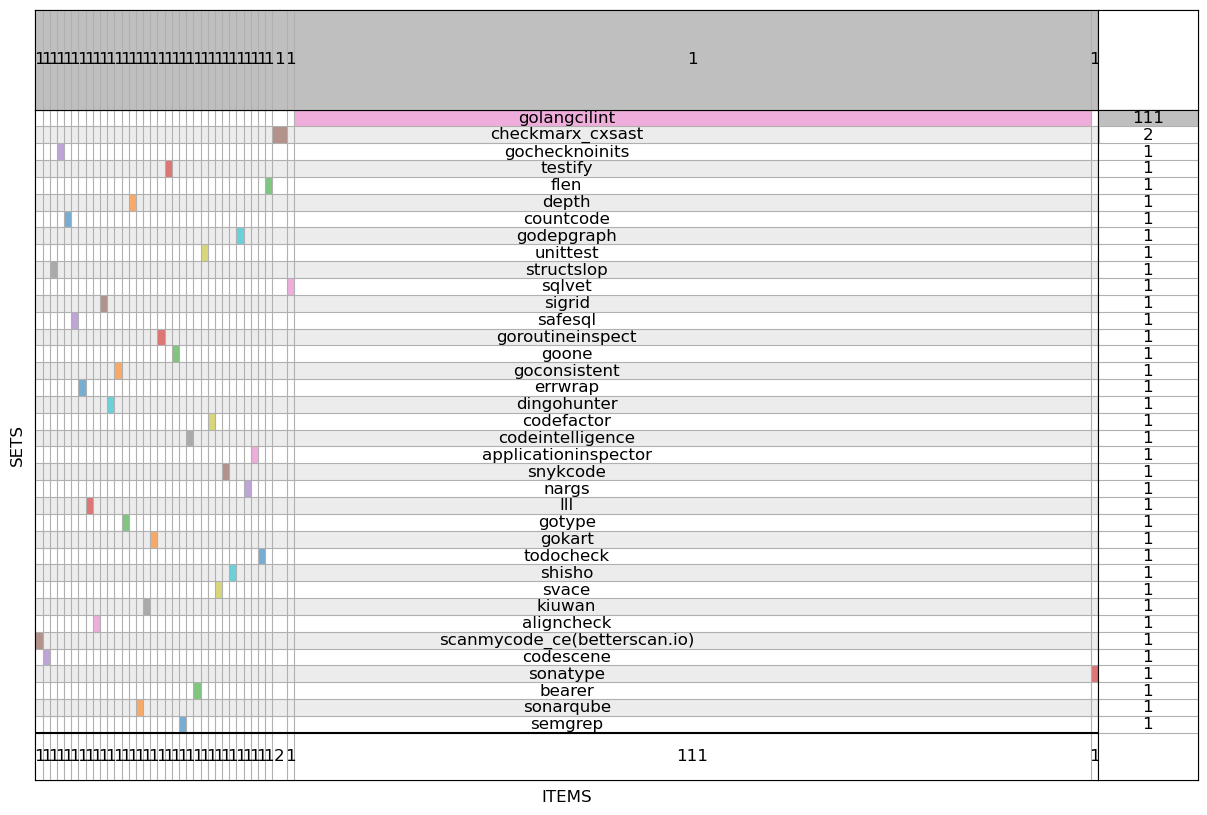

In [59]:
plt.figure(figsize=(15, 10))
supervenn(sets2, labels2)
plt.plot()
None

## Что было сделано к данному моменту
- <h4>Придумано "удобное" представление выходных данных golangcilint</h4>
- <h4>Написан "лексический анализатор" для выходных данных golangcilint</h4>
- <h4>Написан преобразователь в csv</h4>

## Для чего нужно преобразовывать данные

In [28]:
!head -20 cilint_out.txt

pkg/highlight/highlighter.go:54:6: `combineLineMatch` is unused (deadcode)
func combineLineMatch(src, dst LineMatch) LineMatch {
     ^
internal/buffer/buffer.go:33:7: `backupTime` is unused (deadcode)
const backupTime = 8000
      ^
internal/action/infocomplete.go:80:6: `contains` is unused (deadcode)
func contains(s []string, e string) bool {
     ^
cmd/micro/micro.go:35:2: `autosave` is unused (deadcode)
	autosave chan bool
	^
internal/screen/screen.go:90:2: declaration has 3 blank identifiers (dogsled)
	r, _, _, _ := Screen.GetContent(x, y)
	^
internal/lua/lua.go:149: 149-215 lines are duplicate of `internal/lua/lua.go:217-283` (dupl)
func importNet() *lua.LTable {
	pkg := L.NewTable()

	L.SetField(pkg, "CIDRMask", luar.New(L, net.CIDRMask))


## Требуется "вытащить" все полезные данные из вывода и организовать в формат csv
### Для этого на c++ написаны анализатор и преобразователь 

In [29]:
string1 = ""
with open("code.txt", "r") as myfile:
    string1 = myfile.read()

list1 = string1.split("$$$")
code = pd.Series(list1[1:])

In [30]:
data = pd.read_csv("meta.csv", sep=";;", engine='python')

In [31]:
data["code"] = code

In [32]:
data

,file,row,col,error,analyzer,code
0,pkg/highlight/highlighter.go,54,6,`combineLineMatch` is unused,(deadcode),"\nfunc combineLineMatch(src, dst LineMatch) Li..."
1,internal/buffer/buffer.go,33,7,`backupTime` is unused,(deadcode),\nconst backupTime = 8000\n ^\n
2,internal/action/infocomplete.go,80,6,`contains` is unused,(deadcode),"\nfunc contains(s []string, e string) bool {\n..."
3,cmd/micro/micro.go,35,2,`autosave` is unused,(deadcode),\n\tautosave chan bool\n\t^\n
4,internal/screen/screen.go,90,2,declaration has 3 blank identifiers,(dogsled),"\n\tr, _, _, _ := Screen.GetContent(x, y)\n\t^\n"
...,...,...,...,...,...,...
846,internal/buffer/save.go,84,11,error returned from external package is unwrap...,(wrapcheck),\n\t\t\treturn err\n\t\t\t ^\n
847,internal/buffer/save.go,157,13,error returned from external package is unwrap...,(wrapcheck),\n\t\t\t\t\treturn mkdirallErr\n\t\t\t\t\t ...
848,internal/buffer/save.go,169,10,error returned from external package is unwrap...,(wrapcheck),\n\t\treturn err\n\t\t ^\n
849,internal/buffer/settings.go,94,10,error returned from external package is unwrap...,(wrapcheck),\n\t\treturn err\n\t\t ^\n


In [33]:
data["file"].value_counts()

file
internal/buffer/buffer.go          62
pkg/highlight/highlighter.go       45
internal/action/command.go         44
internal/action/actions.go         41
internal/action/bufpane.go         37
                                   ..
internal/config/autosave.go         1
internal/buffer/stack.go            1
internal/buffer/autocomplete.go     1
cmd/micro/debug.go                  1
internal/config/globals.go          1
Name: count, Length: 77, dtype: int64

### Посмотрим на гистограмму срабатываний для файла internal/buffer/buffer.go

In [34]:
row_count = 1273
string2 = "internal/buffer/buffer.go"

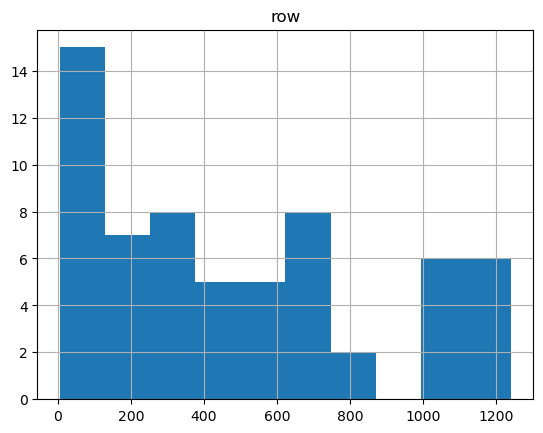

In [129]:
data[data["file"] == string2].hist("row")
None

## Что еще предстоит сделать (февраль)
1) <h3>Просмотреть и отсеять остальные анализаторы, из выбранного списка, на предмет работоспособности и возможности использования</h3>
2) <h3>Написать преобразователи вывода для данных анализаторов</h3>
3) <h3>Попробовать локализовать разметку срабатываний</h3>
4) <h3>Разметить данные</h3>
5) <h3>Разработать дизайн исследования, выбрать метрики (небходима достоверная экстраполяция)</h3>
6) <h3>Провести исследование и в результате получить математически обоснованный вывод на основне метрик</h3>

In [35]:
len(labels2)

37

In [36]:
for i in range(len(labels2)):
    print(labels2[i], i)

semgrep 0
sonarqube 1
bearer 2
sonatype 3
codescene 4
scanmycode_ce(betterscan.io) 5
aligncheck 6
kiuwan 7
svace 8
shisho 9
todocheck 10
gokart 11
gotype 12
lll 13
nargs 14
snykcode 15
applicationinspector 16
codeintelligence 17
codefactor 18
dingohunter 19
errwrap 20
goconsistent 21
goone 22
goroutineinspect 23
safesql 24
sigrid 25
sqlvet 26
structslop 27
unittest 28
godepgraph 29
countcode 30
depth 31
flen 32
testify 33
gochecknoinits 34
checkmarx_cxsast 35
golangcilint 36


In [37]:
not_anlz = [33, 32, 31, 30, 29, 28, 23, 20, 18, 13, 12, 10, 3]
have_smt_but_not_anlz = [21, 15]
hard_to_get = [35, 25, 17, 7, 0]
hard_to_work = [16, 9, 4, 1]
replaced_by = [6]
sql_anlz = [26, 24, 22]
little_func = [34, 27, 19, 14]

<h2>Не статические анализаторы</h2>

- testify
- flen
- depth
- countcode
- godepgraph
- unittest
- goroutineinspect
- goconsistent
- codefactor
- lll
- gotype
- todocheck
- sonatype

<h2>Полезные, но не имеют отношения к делу</h2>

- errwrap
- snykcode

<h2>Сложно получить(требуют оплату, официально зарегистрированную организацию) и имеют слабую поддржку GO</h2>

- checkmarx_cxsast
- sigrid
- codeintelligence
- kiuwan
- semgrep

<h2>Сложно работать(непонятно как собрать, заблокирована или отсуствует документация, заточены под windows)</h2>

- applicationinspector
- shisho
- codescene
- sonarqube

<h2>Будут проанализированы в составе другого анализатора</h2>

- aligncheck (goreporter)

<h2>Анализируют только sql</h2>

- sqlvet
- safesql
- goone

<h2>Имеют маленькую функциональность</h2>

- gochecknoinits
- structslop
- dingohunter
- nargs

In [38]:
labels3 = labels2.copy()
labels3 += ["goreporter"]
labels3 += ["gometalinter"]

In [39]:
for i in not_anlz:
    labels3[i] = None
for i in have_smt_but_not_anlz:
    labels3[i] = None
for i in hard_to_get:
    labels3[i] = None
for i in hard_to_work:
    labels3[i] = None
for i in replaced_by:
    labels3[i] = None
for i in sql_anlz:
    labels3[i] = None
for i in little_func:
    labels3[i] = None

<h2>Оставшиеся анализаторы (пригодные для дальнейшего анализа)</h2>

In [40]:
for i in labels3:
    if i is not None:
        print(i)

bearer
scanmycode_ce(betterscan.io)
svace
gokart
golangcilint
goreporter
gometalinter


<h2>svace требует ключ активации, но кажется перспективным</h2>
<h4>для получения ключа требуется официальный запрос от коммерческой организации</h4>
<h4>можно ли достать?</h4>

In [41]:
! head -25 bearer_micro.txt



Security Report


Rules: 
https://docs.bearer.com/reference/rules [v0.32.0]

Language  Default Rules  Custom Rules  Files  
Go        55             0             95     


HIGH: Unsanitized dynamic input in OS command [CWE-78]
https://docs.bearer.com/reference/rules/go_gosec_injection_subproc_injection
To ignore this finding, run: bearer ignore add 3ec452176b6ffa5248fbd92448220c45_0

File: micro/internal/action/command.go:146

 146 	cmd := exec.Command(args[0], args[1:]...)

HIGH: Unsanitized dynamic input in OS command [CWE-78]
https://docs.bearer.com/reference/rules/go_gosec_injection_subproc_injection
To ignore this finding, run: bearer ignore add cff73d62736c07e9cf0aefd39413d9fd_0



In [42]:
!tail -12  bearer_micro.txt


55 checks, 54 findings

CRITICAL: 0
HIGH: 5 (CWE-328, CWE-78)
MEDIUM: 0
LOW: 36 (CWE-276, CWE-327, CWE-328, CWE-378, CWE-502, CWE-625, CWE-73, CWE-918)

Need help or want to discuss the output? Join the Community https://discord.gg/eaHZBJUXRF



<h2>Для всех оставшихся были написаны преобразователи вывода</h2>

# Что еще предстоит сделать (март)

## Первый вариант (изначальный план)
1) <h3>Попробовать локализовать разметку срабатываний</h3>
2) <h3>Разметить данные</h3>
3) <h3>Разработать дизайн исследования, выбрать метрики (небходима достоверная экстраполяция)</h3>
4) <h3>Провести исследование и в результате получить математически обоснованный вывод на основне метрик</h3>

## Второй вариант (на случай если сравнивать будет нечего)
1) <h3>Разобраться в исходном коде golangci-lint</h3>
2) <h3>Посмотреть и оценить имеющиеся там правила</h3>
3) <h3>Выявить неработоспособные правила</h3>
4) <h3>Разработать рекомендации по эффективному использованию и запуску golangci-lint</h3>
5) <h3>Возможно собрать свой пакет, если не получится нормально работать с golangci-lint</h3>

In [43]:
bearer_data = pd.read_csv("bearer.csv", sep=";;", engine='python')

In [44]:
golangcilint_data = data.copy()

In [45]:
svace_data = pd.read_csv("svace.csv", sep=";;", engine='python')

In [46]:
bearer_data.head()

,level,error,file,row,code
0,HIGH,Unsanitized dynamic input in OS command [CWE-78],internal/action/command.go,146,"\tcmd := exec.Command(args[0], args[1:]...)"
1,HIGH,Unsanitized dynamic input in OS command [CWE-78],internal/buffer/save.go,36,"\t\tcmd = exec.Command(config.GlobalSettings[""..."
2,HIGH,Unsanitized dynamic input in OS command [CWE-78],internal/shell/job.go,64,"\tproc := exec.Command(cmdName, cmdArgs...)"
3,HIGH,Unsanitized dynamic input in OS command [CWE-78],internal/shell/terminal.go,77,"\tcmd := exec.Command(execCmd[0], execCmd[1:]...)"
4,HIGH,Usage of weak hashing library (MD5) [CWE-328],internal/buffer/buffer.go,674,\th.Sum((*out)[:0])


In [47]:
golangcilint_data.head()

,file,row,col,error,analyzer,code
0,pkg/highlight/highlighter.go,54,6,`combineLineMatch` is unused,(deadcode),"\nfunc combineLineMatch(src, dst LineMatch) Li..."
1,internal/buffer/buffer.go,33,7,`backupTime` is unused,(deadcode),\nconst backupTime = 8000\n ^\n
2,internal/action/infocomplete.go,80,6,`contains` is unused,(deadcode),"\nfunc contains(s []string, e string) bool {\n..."
3,cmd/micro/micro.go,35,2,`autosave` is unused,(deadcode),\n\tautosave chan bool\n\t^\n
4,internal/screen/screen.go,90,2,declaration has 3 blank identifiers,(dogsled),"\n\tr, _, _, _ := Screen.GetContent(x, y)\n\t^\n"


In [48]:
svace_data.head()

,error,desc,row,file
0,DEREF_OF_NULL.EX,After having been assigned to a nil value at b...,381,micro/internal/buffer/buffer.go
1,DEREF_OF_NULL.GLOBAL,Uninitialized data is read from global variabl...,34,micro/internal/lua/lua.go
2,DEREF_OF_NULL.GLOBAL,Uninitialized data is read from global variabl...,1421,micro/internal/buffer/buffer.go
3,DEREF_OF_NULL.RET,"Pointer 'n', returned from function 'views.Nod...",368,micro/internal/action/tab.go
4,DEREF_OF_NULL.RET,"Pointer 'n', returned from function 'views.Nod...",115,micro/internal/action/termpane.go


In [49]:
string1 = ""
with open("golangcilint_code.txt", "r") as myfile:
    string1 = myfile.read()

list1 = string1.split("$$$")
code = pd.Series(list1[1:])
golangcilint_def_data = pd.read_csv("golangcilint.csv", sep=";;", engine='python')
golangcilint_def_data["code"] = code

In [50]:
golangcilint_def_data.head()

,file,row,col,error,analyzer,code
0,internal/display/bufwindow.go,166,10,composites: github.com/zyedidia/micro/v2/inter...,(govet),"\n\tbloc := buffer.Loc{0, lineN}\n\t ^\n"
1,internal/display/infowindow.go,72,9,composites: github.com/zyedidia/micro/v2/inter...,(govet),"\n\treturn buffer.Loc{c.GetCharPosInLine(l, vl..."
2,internal/display/infowindow.go,90,65,composites: github.com/zyedidia/micro/v2/inter...,(govet),\nfunc (i *InfoWindow) LocFromVLoc(vloc VLoc) ...
3,internal/lua/lua.go,437,43,SA1019: filepath.HasPrefix has been deprecated...,(staticcheck),"\n\tL.SetField(pkg, ""HasPrefix"", luar.New(L, f..."
4,pkg/highlight/highlighter.go,54,6,func `combineLineMatch` is unused,(unused),"\nfunc combineLineMatch(src, dst LineMatch) Li..."


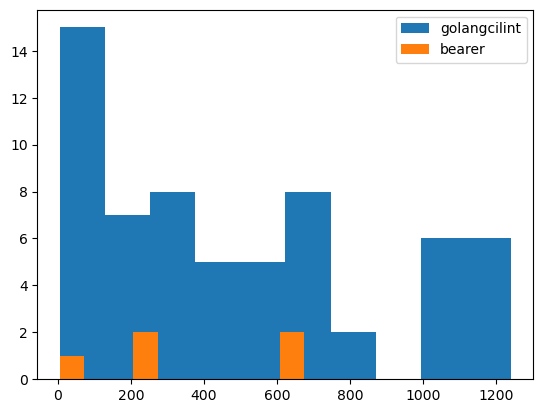

In [13]:
plt.hist(golangcilint_data[golangcilint_data["file"] == "internal/buffer/buffer.go"]["row"], bins=10,
         label="golangcilint")
plt.hist(bearer_data[bearer_data["file"] == "internal/buffer/buffer.go"]["row"], bins = 10, label="bearer")
plt.legend()
#plt.savefig("gist.png", bbox_inches="tight")
plt.show()

In [59]:
bearer_data["file:row"] = bearer_data["file"] + ":" + bearer_data["row"].apply(str)
golangcilint_data["file:row"] = golangcilint_data["file"] + ":" + golangcilint_data["row"].apply(str)
svace_data["file:row"] = svace_data["file"] + ":" + svace_data["row"].apply(str)

In [60]:
set_errors = [set(golangcilint_data["file:row"]), set(bearer_data["file:row"]), set(svace_data["file:row"])]

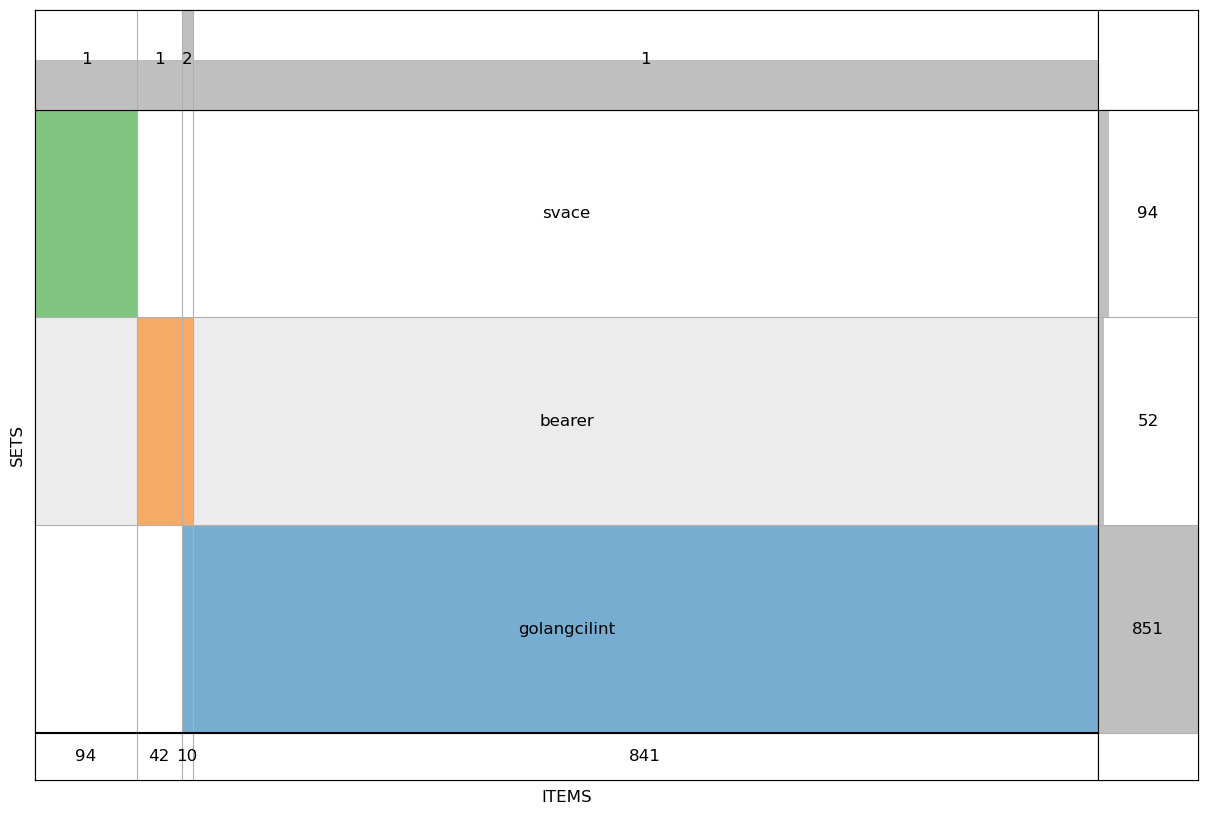

In [61]:
plt.figure(figsize=(15, 10))
supervenn(set_errors, ["golangcilint", "bearer", "svace"])
plt.plot()
#plt.savefig("errors2.png", bbox_inches="tight")
None

In [62]:
golangcilint_def_data["file:row"] = golangcilint_def_data["file"] + ":" + golangcilint_def_data["row"].apply(str)

In [63]:
set_errors[0] = set(golangcilint_def_data["file:row"])

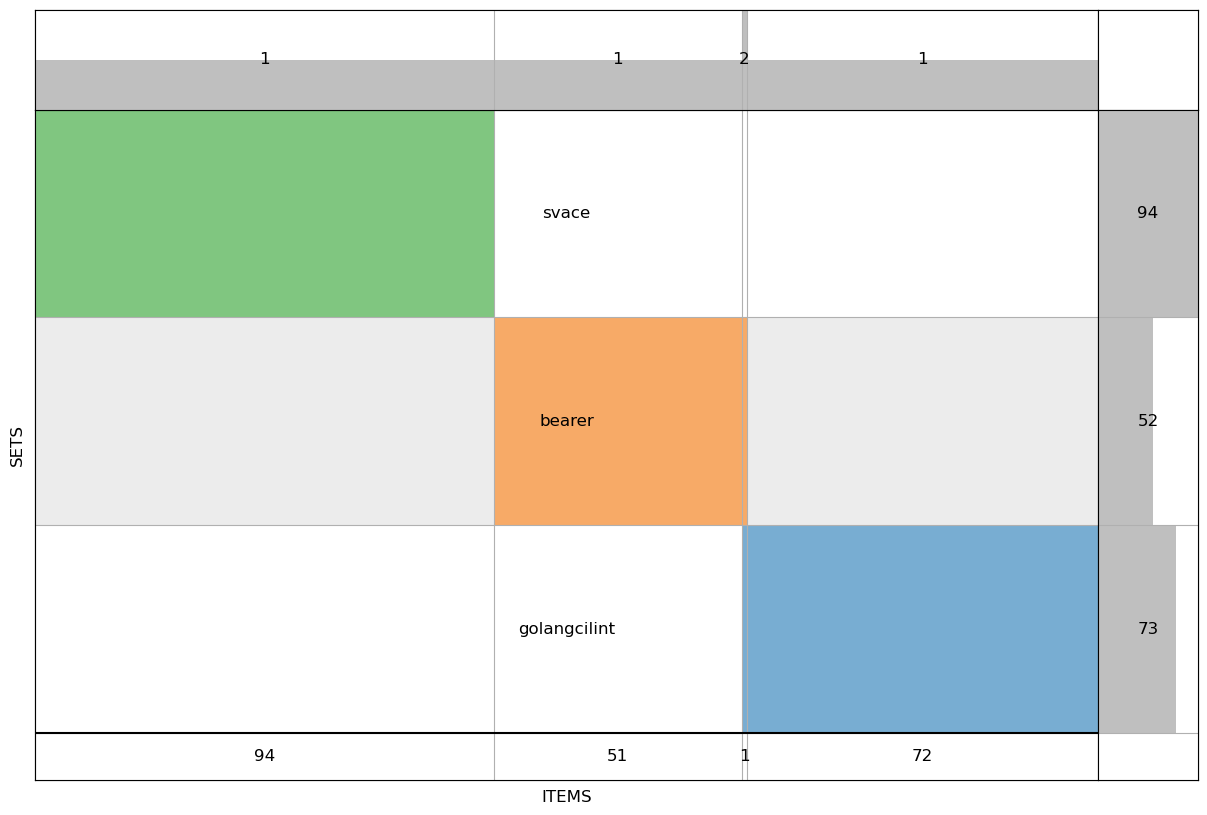

In [64]:
plt.figure(figsize=(15, 10))
supervenn(set_errors, ["golangcilint", "bearer", "svace"])
plt.plot()
#plt.savefig("errors3.png", bbox_inches="tight")
None

In [65]:
set_errors[0] - (set_errors[0] - set_errors[1])

{'internal/action/bindings.go:28'}

In [66]:
one = golangcilint_def_data[golangcilint_def_data["file:row"] == "internal/action/bindings.go:28"]

In [69]:
one

,file,row,col,error,analyzer,code,file:row
45,internal/action/bindings.go,28,19,Error return value of `ioutil.WriteFile` is no...,(errcheck),"\n\t\tioutil.WriteFile(fname, []byte(""{}""), 06...",internal/action/bindings.go:28


In [68]:
bearer_data[bearer_data["file:row"] == 'internal/action/bindings.go:28']

,level,error,file,row,code,file:row
16,LOW,Permissive file creation [CWE-276],internal/action/bindings.go,28,"\t\tioutil.WriteFile(fname, []byte(""{}""), 0644)",internal/action/bindings.go:28


In [67]:
one["error"].values[0]

'Error return value of `ioutil.WriteFile` is not checked'

In [75]:
one["code"].values[0]

'\n\t\tioutil.WriteFile(fname, []byte("{}"), 0644)\n\t\t                ^\n'

In [78]:
golangcilint_def_data["error"].unique()

array(['composites: github.com/zyedidia/micro/v2/internal/buffer.Loc struct literal uses unkeyed fields',
       "SA1019: filepath.HasPrefix has been deprecated since Go 1.0 because it shouldn't be used: HasPrefix does not respect path boundaries and does not ignore case when required.",
       'func `combineLineMatch` is unused',
       'Error return value of `b.Backup` is not checked',
       'Error return value of `os.Mkdir` is not checked',
       'Error return value of `config.InitLocalSettings` is not checked',
       'Error return value of `b.UpdateModTime` is not checked',
       'Error return value is not checked',
       'Error return value of `b.Serialize` is not checked',
       'Error return value of `config.InitGlobalSettings` is not checked',
       'Error return value of `clipboard.WriteMulti` is not checked',
       'Error return value of `cmd.Process.Kill` is not checked',
       'Error return value of `pl.Load` is not checked',
       'const `backupTime` is unused', 

In [79]:
svace_data["error"].unique()

array(['DEREF_OF_NULL.EX', 'DEREF_OF_NULL.GLOBAL', 'DEREF_OF_NULL.RET',
       'DIVISION_BY_ZERO.EX', 'DIVISION_BY_ZERO.EX.FLOAT', 'DOUBLE_CLOSE',
       'HANDLE_LEAK',
       'INFINITE_LOOP.GOROUTINE: The loop is infinite at micro.go:371 since all exit conditions are false. Note',
       'INFINITE_LOOP.GOROUTINE: The loop is infinite at backup.go:35 since all exit conditions are false. Note',
       'UNCHECKED_TUPLE.RET', 'UNREACHABLE_CODE', 'UNSAFE_TYPE_SWITCH',
       'UNUSED_ERROR_RETURN.STRICT'], dtype=object)

In [118]:
svace_data[svace_data["error"] == 'UNCHECKED_TUPLE.RET']["desc"]

29    Using value of a tuple 'b' at bufpane.go:335 w...
30    Using value of a tuple 'b' at bufpane.go:344 w...
31    Using value of a tuple 'p' at command.go:255 w...
32    Using value of a tuple 'fi' at util.go:218 wit...
33    Using value of a tuple 'wd' at command.go:254 ...
34    Using value of a tuple 'data' at line_array.go...
35    Using value of a tuple 'resp' at message.go:43...
36    Using value of a tuple 'srcs' at rtfiles.go:21...
37    Using value of a tuple 'files' at rtfiles.go:1...
38    Using value of a tuple 'files' at autocomplete...
39    Using value of a tuple 'files' at rtfiles.go:2...
40    Using value of a tuple 'regex' at command.go:8...
41    Using value of a tuple 'Screen' at screen.go:1...
42    Using value of a tuple 'Screen' at screen.go:1...
43    Using value of a tuple 'match[0]' at actions.g...
44    Using value of a tuple 'match[0]' at actions.g...
45    Using value of a tuple 'match[0]' at actions.g...
46    Using value of a tuple 'match[0]' at actio

In [84]:
bearer_data["error"].unique()

array(['Unsanitized dynamic input in OS command [CWE-78]',
       'Usage of weak hashing library (MD5) [CWE-328]',
       'Import of weak hashing library (MD5) [CWE-328]',
       'Usage of weak hashing library [CWE-327]',
       'Permissive file assignment [CWE-276]',
       'Missing configuration against decompression bomb [CWE-327]',
       'Unsanitized user input in file path [CWE-73]',
       'Permissive file creation [CWE-276]',
       'Permissive temporary file creation [CWE-378]',
       'Unsanitized user input in HTTP request (SSRF) [CWE-918]',
       'Unsanitized user input in deserialization method [CWE-502]',
       'Missing validation for regular expression [CWE-625]',
       'Leakage of information in logger message [CWE-532]'], dtype=object)

In [14]:
len(set_errors[0])

52

In [15]:
len(set_errors[1])

851

In [17]:
from matplotlib_venn import venn2

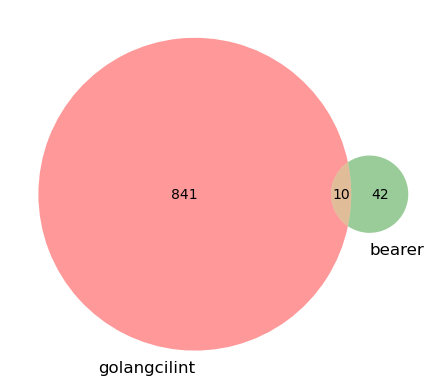

In [38]:
venn2((len(set_errors[1] - set_errors[0]), len(set_errors[0]) - len(set_errors[1] & set_errors[0]), 
    len(set_errors[1] & set_errors[0])),set_labels=("golangcilint", "bearer"))
#plt.savefig("errors_venn.png", bbox_inches="tight")
plt.show()

In [17]:
bearer_unique = bearer_data[~bearer_data["file:row"].isin(golangcilint_data["file:row"])]

In [29]:
bearer_unique

,level,error,file,row,code,file:row
2,HIGH,Unsanitized dynamic input in OS command [CWE-78],internal/shell/job.go,64,"\tproc := exec.Command(cmdName, cmdArgs...)",internal/shell/job.go:64
4,HIGH,Usage of weak hashing library (MD5) [CWE-328],internal/buffer/buffer.go,674,\th.Sum((*out)[:0]),internal/buffer/buffer.go:674
7,LOW,Permissive file assignment [CWE-276],cmd/micro/debug.go,21,"\t\tf, err := os.OpenFile(""log.txt"", os.O_RDWR...",cmd/micro/debug.go:21
8,LOW,Permissive file assignment [CWE-276],internal/buffer/save.go,57,"\t} else if writeCloser, err = os.OpenFile(nam...",internal/buffer/save.go:57
11,LOW,Unsanitized user input in file path [CWE-73],internal/buffer/buffer.go,249,"\tfile, err := os.Open(filename)",internal/buffer/buffer.go:249
12,LOW,Unsanitized user input in file path [CWE-73],internal/buffer/save.go,57,"\t} else if writeCloser, err = os.OpenFile(nam...",internal/buffer/save.go:57
13,LOW,Unsanitized user input in file path [CWE-73],runtime/syntax/make_headers.go,46,"\tsource, err := ioutil.ReadFile(filename)",runtime/syntax/make_headers.go:46
14,LOW,Unsanitized user input in file path [CWE-73],runtime/syntax/make_headers.go,67,"\tdata, _ := ioutil.ReadFile(name + "".hdr"")",runtime/syntax/make_headers.go:67
15,LOW,Unsanitized user input in file path [CWE-73],tools/testgen.go,213,"\t\tsource, err := ioutil.ReadFile(filename)",tools/testgen.go:213
17,LOW,Permissive file creation [CWE-276],internal/action/bindings.go,288,"\t\treturn true, ioutil.WriteFile(filename, ap...",internal/action/bindings.go:288


In [21]:
bearer_unique["error"].unique()

array(['Unsanitized dynamic input in OS command [CWE-78]',
       'Usage of weak hashing library (MD5) [CWE-328]',
       'Permissive file assignment [CWE-276]',
       'Unsanitized user input in file path [CWE-73]',
       'Permissive file creation [CWE-276]',
       'Permissive temporary file creation [CWE-378]',
       'Unsanitized user input in deserialization method [CWE-502]',
       'Missing validation for regular expression [CWE-625]',
       'Leakage of information in logger message [CWE-532]'], dtype=object)

In [27]:
for i in bearer_unique["error"].unique():
    print(i, len(bearer_unique[bearer_unique["error"] == i]))

Unsanitized dynamic input in OS command [CWE-78] 1
Usage of weak hashing library (MD5) [CWE-328] 1
Permissive file assignment [CWE-276] 2
Unsanitized user input in file path [CWE-73] 5
Permissive file creation [CWE-276] 5
Permissive temporary file creation [CWE-378] 1
Unsanitized user input in deserialization method [CWE-502] 3
Missing validation for regular expression [CWE-625] 14
Leakage of information in logger message [CWE-532] 12


In [32]:
ind = 0
for i in bearer_unique["code"]:
    ind += 1
    print(ind, i)

1 	proc := exec.Command(cmdName, cmdArgs...)
2 	h.Sum((*out)[:0])
3 		f, err := os.OpenFile("log.txt", os.O_RDWR|os.O_CREATE|os.O_TRUNC, 0666)
4 	} else if writeCloser, err = os.OpenFile(name, os.O_WRONLY|os.O_CREATE|os.O_TRUNC, 0644); err != nil {
5 	file, err := os.Open(filename)
6 	} else if writeCloser, err = os.OpenFile(name, os.O_WRONLY|os.O_CREATE|os.O_TRUNC, 0644); err != nil {
7 	source, err := ioutil.ReadFile(filename)
8 	data, _ := ioutil.ReadFile(name + ".hdr")
9 		source, err := ioutil.ReadFile(filename)
10 		return true, ioutil.WriteFile(filename, append(txt, '\n'), 0644)
11 		return ioutil.WriteFile(filename, append(txt, '\n'), 0644)
12 		err = ioutil.WriteFile(filename, append(txt, '\n'), 0644)
13 		err = ioutil.WriteFile(filename, append(txt, '\n'), 0644)
14 			err := ioutil.WriteFile("/tmp/micro-info.plist", infoPlistData, 0644)
15 			err := ioutil.WriteFile("/tmp/micro-info.plist", infoPlistData, 0644)
16 	err := yaml.Unmarshal(data, &hdrYaml)
17 	if err = yaml.Unmar

In [61]:
bearer_data[bearer_data["file:row"].isin(golangcilint_data["file:row"])]

,level,error,file,row,code,file:row
0,HIGH,Unsanitized dynamic input in OS command [CWE-78],internal/action/command.go,146,"\tcmd := exec.Command(args[0], args[1:]...)",internal/action/command.go:146
1,HIGH,Unsanitized dynamic input in OS command [CWE-78],internal/buffer/save.go,36,"\t\tcmd = exec.Command(config.GlobalSettings[""...",internal/buffer/save.go:36
3,HIGH,Unsanitized dynamic input in OS command [CWE-78],internal/shell/terminal.go,77,"\tcmd := exec.Command(execCmd[0], execCmd[1:]...)",internal/shell/terminal.go:77
5,LOW,Import of weak hashing library (MD5) [CWE-328],internal/buffer/buffer.go,6,"\t""crypto/md5""",internal/buffer/buffer.go:6
6,LOW,Usage of weak hashing library [CWE-327],internal/buffer/buffer.go,646,\th := md5.New(),internal/buffer/buffer.go:646
9,LOW,Missing configuration against decompression bo...,internal/config/plugin_installer.go,461,"\t\t\tif _, err = io.Copy(target, content); er...",internal/config/plugin_installer.go:461
10,LOW,Unsanitized user input in file path [CWE-73],internal/buffer/buffer.go,237,"\tf, err := os.OpenFile(filename, os.O_WRONLY, 0)",internal/buffer/buffer.go:237
16,LOW,Permissive file creation [CWE-276],internal/action/bindings.go,28,"\t\tioutil.WriteFile(fname, []byte(""{}""), 0644)",internal/action/bindings.go:28
23,LOW,Unsanitized user input in HTTP request (SSRF) ...,internal/util/util.go,501,"\treq, err := http.NewRequest(method, url, nil)",internal/util/util.go:501
42,WARNING,Leakage of information in logger message [CWE-...,cmd/micro/micro.go,244,"\t\t\tlog.Fatal(""error creating CPU profile: ""...",cmd/micro/micro.go:244


In [62]:
golangcilint_data[golangcilint_data["file:row"].isin(bearer_data["file:row"])]

,file,row,col,error,analyzer,code,file:row
42,internal/action/bindings.go,28,19,Error return value of `ioutil.WriteFile` is no...,(errcheck),"\n\t\tioutil.WriteFile(fname, []byte(""{}""), 06...",internal/action/bindings.go:28
150,cmd/micro/micro.go,244,4,"exitAfterDefer: log.Fatal will exit, and `defe...",(gocritic),"\n\t\t\tlog.Fatal(""error creating CPU profile:...",cmd/micro/micro.go:244
186,internal/config/plugin_installer.go,461,16,G110: Potential DoS vulnerability via decompre...,(gosec),"\n\t\t\tif _, err = io.Copy(target, content); ...",internal/config/plugin_installer.go:461
189,internal/buffer/buffer.go,6,2,G501: Blocklisted import crypto/md5: weak cryp...,(gosec),"\n\t""crypto/md5""\n\t^\n",internal/buffer/buffer.go:6
190,internal/buffer/buffer.go,646,7,G401: Use of weak cryptographic primitive,(gosec),\n\th := md5.New()\n\t ^\n,internal/buffer/buffer.go:646
191,internal/buffer/save.go,36,9,G204: Subprocess launched with a potential tai...,(gosec),\n\t\tcmd = exec.Command(config.GlobalSettings...,internal/buffer/save.go:36
195,internal/shell/terminal.go,77,9,G204: Subprocess launched with a potential tai...,(gosec),"\n\tcmd := exec.Command(execCmd[0], execCmd[1:...",internal/shell/terminal.go:77
196,internal/action/command.go,146,9,G204: Subprocess launched with a potential tai...,(gosec),"\n\tcmd := exec.Command(args[0], args[1:]...)\...",internal/action/command.go:146
672,internal/util/util.go,501,29,should rewrite http.NewRequestWithContext or a...,(noctx),"\n\treq, err := http.NewRequest(method, url, n...",internal/util/util.go:501
690,internal/buffer/buffer.go,237,37,O_WRONLY contains underscore. You should use m...,(nosnakecase),"\n\tf, err := os.OpenFile(filename, os.O_WRONL...",internal/buffer/buffer.go:237
